In [1]:
import sys
from pprint import pprint
from osgeo import gdal
gdal.UseExceptions()
import rasterio
from rasterio.windows import Window
from matplotlib import pyplot as plt
import numpy as np
import tables
import zarr

sys.path.append('..')

from CustomDatasets.CustomDataset import CustomDataset


In [2]:
# opt = gdal.TranslateOptions(bandList=[1,2,3], format="png", outputType=gdalconst.GDT_Byte)
# gdal.Translate("84278T_001.jpg", "./local_imgs/84278T_001.tif", options=opt)

with rasterio.open("s3://digpath-data/Standard/84278T_001.tif") as data:
    # img = data.read(window=Window.from_slices((50000, 70000), (50000, 70000)))
    img = data.read()

img = np.moveaxis(img, 0, -1)

# f = tables.open_file("84278T_001.h5", mode="w")
# gcolumns = f.create_group(f.root, "columns", "data")
# f.create_array(gcolumns, "data", img, "data")
# f.close()


zarr.save("84278T_001.zarr", img)

print(img.shape)

# plt.imshow(img)
# plt.show()

print("lol")


/home/heaven/anaconda3/envs/pytorch/lib/python3.9/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(32045, 50375, 3)
lol


In [4]:
out = zarr.load("84278T_001.zarr")

print(out.shape)

(32045, 50375, 3)


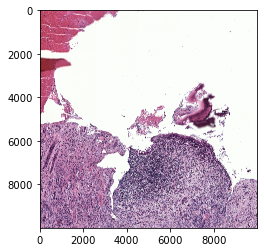

In [3]:
from osgeo import gdal
import numpy as np

path = '/vsis3/digpath-data/Standard/84278T_001.tif'
ds = gdal.Open(path)

xoff, yoff, xcount, ycount = (10000, 10000, 10000, 10000)
np_array = ds.ReadAsArray(xoff, yoff, xcount, ycount)

np_array = np.moveaxis(np_array, 0, -1)

plt.imshow(np_array)
plt.show()

plt.imsave("84278T_001.png", np_array)
